This code is used to generate a set of races using the a race scheduling algorithm patterned after the Stearns (i.e., __Chaotic__) race scheduling method. It only works for a 3 lane raingutter regatta or pinewood derby race. The criteria are simple: make sure that each boy races the same number of times, make sure that boys never race in 2 consecutive races, and make sure that no 2 boys races each other more than once, and make sure that boys race the same number of times in each of the 3 lanes (all while being as random as possible).

In [42]:
%matplotlib inline

from collections import Counter
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def hasConsecutiveRepeats(boys):
    last = ""
    for b in boys:
        if b == last:
            return True
        last = b
    return False

def sortedTuple(b1, b2):
    if b1 < b2:
        return (b1,b2)
    return (b2,b1)

# Depth-first search for a lane1 configuration that "works"
def fillInLane1(lane0, c, pairs, i, lane1):
    cands = [k for k,count in c.items() if count > 0]
    random.shuffle(cands)
    llane1 = lane1
    for candBoy in cands:
        p = sortedTuple(candBoy, lane0[i])
        if candBoy == lane0[i] or ((i > 0 and candBoy == lane0[i-1])
                                    or (i>0 and candBoy == llane1[-1])
                                    or (i< (len(lane0)-1) and candBoy == lane0[i+1])
                                    or p in pairs):
            pass
        else:
            # Build new frontier state to push onto the stack
            llane1.append(candBoy)
            
            if len(llane1) != i+1:
                print("i = {}, but len(lane1) = {}".format(i, len(lane1)))
            # If we have added the last boy and fulfilled our destiny, return lane1
            c[candBoy] -= 1
            
            pairs.add(p)
            if(len(lane0) == len(llane1)):
                return llane1
            e = []
            e.extend(llane1)
            l1 = fillInLane1(lane0, c, pairs, i+1, e)
            if l1:
                return l1

            llane1 = llane1[:-1]
            c[candBoy] += 1
            pairs.remove(p)
    return []

# Ran out of time to do something smart, instead we just guess and check our way through
def fillInLane2(lane0, lane1, boys, numRacesEach, lane2):
    cands = boys * numRacesEach
    random.shuffle(cands)
    
    isGood = False
    while not isGood:
        isGood = True
        for i in range(0, len(cands)):
            candBoy = cands[i]
            # Check each item for a bad state, if there is a problem,
            # randomly swap until there aren't any more problems
            if (candBoy == lane0[i] or candBoy == lane1[i]
                                    or (i > 0 and (candBoy == lane0[i-1] or candBoy == lane1[i-1] or candBoy == cands[i-1]))
                                    or (i< (len(lane0)-1) and (candBoy == lane0[i+1] or candBoy == lane1[i+1]))):
                # Swap the "bad" candidate with a random location
                r = random.randint(0, len(cands)-1) 
                t = cands[i]
                cands[i] = cands[r]
                cands[r] = t
                isGood = False
    return cands
    
def buildRaces(boys, numRacesEach=3):
    """numRacesEach is the number of times the boys will race in
    each lane."""
    pairs = set()
    lane0 = boys * numRacesEach
    random.shuffle(lane0)
    lane1 = []
    # Get a shuffled list of boys for the lane 0 contestants
    while hasConsecutiveRepeats(lane0):
        random.shuffle(lane0)
    c = Counter(lane0)
        
    lane1 = fillInLane1(lane0, c, pairs, 0, lane1)
    
    lane2 = []
    lane2 = fillInLane2(lane0, lane1, boys, numRacesEach, lane2)

    print(Counter(lane0))
    print(Counter(lane1))
    print(Counter(lane2))
    neg1s = [-1] * len(lane2)
    return(list(zip(lane0, lane1, lane2, neg1s, neg1s)))

Type the names of the boys inside the quotation marks. Use commas to separate the names, don't include spaces unless the space is part of the boy's name.

In [43]:
boys = "Danny,Ian,David,Stirling,Braxton,Edgar,Ryan,Zach,Noah,Michael,Torrin".split(",")

The output of the following command will be the list of races. The races are listed as pairs of boys names "(A,B,C)" where A, B, and C are the names of the boys that should race in lanes 0, 1, and 2, respectively. You can change the second parameter of buildRaces to a higher number if you would like, though there is a theoretical max (n -1, where n is the number of boys).

In [44]:
races = buildRaces(boys, 2)
print("The following {} races will be scheduled.".format(len(races)))
races

Counter({'Ian': 2, 'Zach': 2, 'Noah': 2, 'Michael': 2, 'Stirling': 2, 'Edgar': 2, 'David': 2, 'Danny': 2, 'Ryan': 2, 'Torrin': 2, 'Braxton': 2})
Counter({'Danny': 2, 'Braxton': 2, 'Noah': 2, 'Stirling': 2, 'Zach': 2, 'Michael': 2, 'Edgar': 2, 'David': 2, 'Ian': 2, 'Ryan': 2, 'Torrin': 2})
Counter({'Danny': 2, 'Braxton': 2, 'Noah': 2, 'Michael': 2, 'Zach': 2, 'Stirling': 2, 'Ryan': 2, 'David': 2, 'Ian': 2, 'Edgar': 2, 'Torrin': 2})
The following 22 races will be scheduled.


[('Danny', 'David', 'Ian', -1, -1),
 ('Noah', 'Braxton', 'Ryan', -1, -1),
 ('Ian', 'Danny', 'Stirling', -1, -1),
 ('Ryan', 'Zach', 'Torrin', -1, -1),
 ('Edgar', 'Michael', 'Braxton', -1, -1),
 ('Stirling', 'Noah', 'Danny', -1, -1),
 ('Zach', 'David', 'Michael', -1, -1),
 ('Braxton', 'Ian', 'Noah', -1, -1),
 ('Ryan', 'Michael', 'Stirling', -1, -1),
 ('David', 'Edgar', 'Danny', -1, -1),
 ('Torrin', 'Stirling', 'Ryan', -1, -1),
 ('Michael', 'Braxton', 'Edgar', -1, -1),
 ('Ian', 'Torrin', 'Zach', -1, -1),
 ('Noah', 'Edgar', 'Braxton', -1, -1),
 ('Danny', 'Torrin', 'Zach', -1, -1),
 ('Edgar', 'Ryan', 'David', -1, -1),
 ('Stirling', 'Danny', 'Noah', -1, -1),
 ('Torrin', 'Ryan', 'Michael', -1, -1),
 ('David', 'Stirling', 'Ian', -1, -1),
 ('Braxton', 'Zach', 'Torrin', -1, -1),
 ('Michael', 'Ian', 'David', -1, -1),
 ('Zach', 'Noah', 'Edgar', -1, -1)]

Copy and paste everything above after the "Out[N]:", beginning with the open square bracket "[" through the closing square bracket. Paste below after the equals sign. As the races run, change the -1s to the lane number of the winner, and second placer. So, for race (A,B,C), if A wins, and C gets second place, then make sure that line of the outcomes reads (A,B,C,0,2)

In [45]:
outcomes = [('Michael', 'Torrin', 'Noah',1,0),
 ('Braxton', 'Stirling', 'Ian',0,2),
 ('Noah', 'Ryan', 'Edgar',2,1),
 ('Ian', 'Braxton', 'David',1,0),
 ('Danny', 'Ryan', 'Torrin',1,0),
 ('Zach', 'Michael', 'David',0,1),
 ('Edgar', 'Noah', 'Stirling',0,1),
 ('Ryan', 'Ian', 'Danny',2,0),
 ('Braxton', 'Torrin', 'Noah',0,1),
 ('Stirling', 'Danny', 'Ian',2,1),
 ('Noah', 'Braxton', 'Zach',1,2),
 ('David', 'Edgar', 'Ryan',0,2),
 ('Zach', 'Danny', 'Michael',1,2),
 ('Edgar', 'Ian', 'Stirling',0,1),
 ('Danny', 'David', 'Torrin',0,2),
 ('Michael', 'Noah', 'Braxton',2,0),
 ('Stirling', 'Zach', 'Edgar',1,2),
 ('David', 'Michael', 'Ryan',1,2),
 ('Torrin', 'Stirling', 'Danny',2,0),
 ('Ian', 'Zach', 'Michael',1,0),
 ('Torrin', 'David', 'Braxton',2,0),
 ('Ryan', 'Edgar', 'Zach',2,0)]

In [46]:
# Count the number of times that each boy won. Also, the number of times the winner was in each lane.
winCounter = Counter()
secondCounter = Counter()
laneCounter = Counter()
laneCounter2 = Counter()
for outcome in outcomes:
    winner = outcome[outcome[-2]]
    second = outcome[outcome[-1]]
    laneCounter[outcome[-2]] += 1
    laneCounter[outcome[-1]] += 1
    winCounter[winner] += 1
    secondCounter[second] += 1
print(winCounter)
print(secondCounter)

Counter({'Braxton': 6, 'Danny': 4, 'Zach': 4, 'Edgar': 3, 'Michael': 1, 'David': 1, 'Ian': 1, 'Ryan': 1, 'Torrin': 1})
Counter({'Ryan': 5, 'Ian': 4, 'Michael': 4, 'Torrin': 4, 'Danny': 2, 'Zach': 1, 'Noah': 1, 'Edgar': 1})


In [60]:
# Run this cell to calculate the final score: (#times first place * 2) + (#times second place)
scores = Counter()
for k,v in winCounter.items():
    scores[k] = v *2
scores.update(secondCounter)
# Put the outcomes into a nice table, sorted by score-- highest to lowest
df = pd.DataFrame.from_dict(scores, orient='index').reset_index()
df = df.rename(columns={'index':'Racer', 0:'Score'}).set_index('Racer').sort_values(by='Score', ascending=False)
df

,Score
Racer,
Braxton,12
Danny,10
Zach,9
Edgar,7
Ryan,7
Michael,6
Ian,6
Torrin,6
David,2


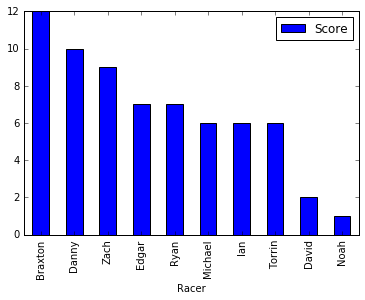

In [61]:
# Visualize the scores with a bar graph
df.plot(kind="bar")

In [48]:
print("Wins by lane: {}".format(laneCounter))

Wins by lane: Counter({0: 16, 1: 14, 2: 14})


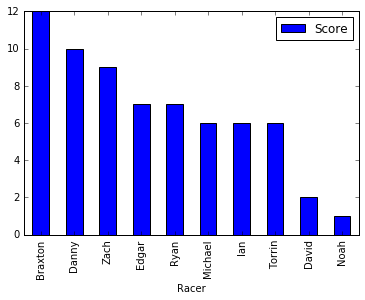

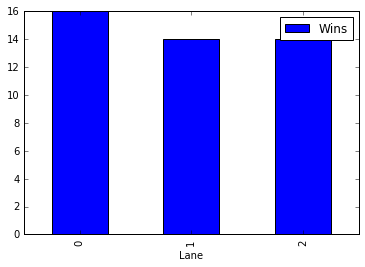

In [59]:
#Bargraph to visualize lane bias, if any
df = pd.DataFrame.from_dict(laneCounter, orient='index').reset_index()
df = df.rename(columns={'index':'Lane', 0:'Wins'}).set_index('Lane').sort_values(by='Wins', ascending=False)
df.plot(kind="bar")